In [9]:
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import omicverse as ov
import os

ov.plot_set()
#print(f'cellphonedb version{cellphonedb.__version__}')

All dependencies are satisfied.


In [10]:
adata_fibro = sc.read("./pyobjs/slideseq_cell2loc_RCTD_level1.h5ad")
adata_fibro = adata_fibro[adata_fibro.obs["Level1_max_pred_celltype"].isin([
                                                                                              "M_Smooth Muscle",
                                                                                                "M_Steroidogenic Theca",
                                                                                                "M_Medullary Stroma",
                                                                                                "M_Pericyte",
                                                                                                "M_Cortical Stroma",
                                                                                                "M_Dividing Mesenchyme",
                                                                                                "M_Immature Theca"])]
adata_fibro

View of AnnData object with n_obs × n_vars = 112323 × 16455
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'Sample', '_indices', '_scvi_batch', '_scvi_labels', 'total_abundance', 'EN_Blood', 'EN_Lymph', 'Epithelium', 'GC_Antral', 'GC_Atretic', 'GC_CL_Active', 'GC_CL_Lytic', 'GC_Estrous', 'GC_Mitotic', 'GC_Mural', 'GC_Preantral', 'I_B_Cell', 'I_Dendritic_Cell', 'I_Granulocyte', 'I_Macrophage', 'I_T_Cell', 'M_Cortical Stroma', 'M_Dividing Mesenchyme', 'M_Immature Theca', 'M_Medullary Stroma', 'M_Pericyte', 'M_Smooth Muscle', 'M_Steroidogenic Theca', 'Oocyte', 'Level1_max_pred', 'Level1_max_pred_celltype'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts-AAV', 'mean_counts-AAV', 'log1p_mean_counts-AAV', 'pct_dropout_by_counts-AAV', 'total_counts-AAV', 'log1p_total_c

In [11]:
adata_fibro.obs["annotation"] = adata_fibro.obs["Level1_max_pred_celltype"]
celltypes = {'M_Steroidogenic Theca': 'Steroidogenic_stromal',
             'M_Smooth Muscle': "Smooth_Muscle",
             'M_Medullary Stroma': "Fibroblast-like_cells",
             'M_Pericyte': 'Pericyte',
             'M_Cortical Stroma': "Fibroblast-like_cells",
             'M_Dividing Mesenchyme': "Dividing_Mesenchyme",
             "M_Immature Theca":"Dividing_Mesenchyme",
             'I_Macrophage':'Macrophage'}

adata_fibro.obs["annotation"] = adata_fibro.obs["annotation"].map(celltypes).astype(str)
# 打印新的注释列的唯一值以确认映射是否正确
print(adata_fibro.obs["annotation"].unique())

['Steroidogenic_stromal' 'Smooth_Muscle' 'Fibroblast-like_cells'
 'Pericyte' 'Dividing_Mesenchyme']


[<AxesSubplot: title={'center': 'ctr'}, xlabel='spatial1', ylabel='spatial2'>]

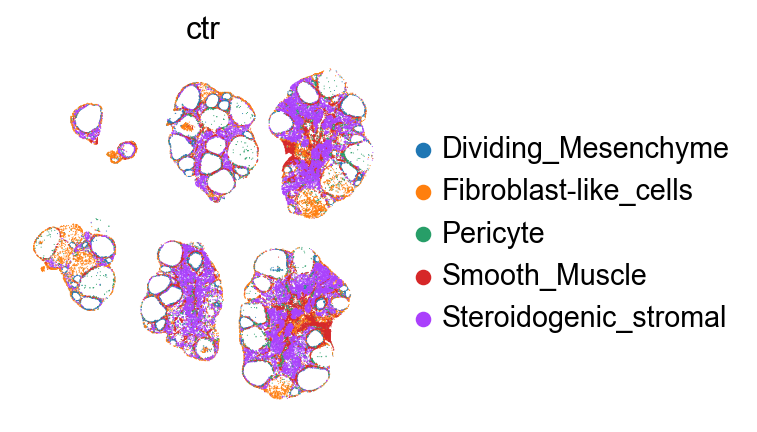

In [12]:
# 创建一个仅用于保存图例的图形
fig, ax = plt.subplots(figsize=(3, 6))  # 这里定义图例保存图形尺寸


subset = adata_fibro[adata_fibro.obs["Sample"] == 'CTR']

sc.pl.spatial(subset, color=['annotation'], 
                wspace=0.0, hspace=0.0, spot_size=30, 
                frameon=False, title="ctr", show=False, ax=ax)

In [13]:
adata_fibro.obs["annotation"] = adata_fibro.obs["annotation"].astype("category")

In [14]:
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex

# 假设你已有一个‘adata’对象并已经进行了基础处理，如聚类等

# 获取annotation类别
annotation_categories = adata_fibro.obs['annotation'].cat.categories

# 选择一个颜色调色板
palette = sns.color_palette("Paired", len(annotation_categories))

# Convert the palette to hex color codes using matplotlib's rgb2hex
colors = [rgb2hex(color) for color in palette]

# 添加颜色信息到adata.uns中
adata_fibro.uns['annotation_colors'] = colors
# 假设你已有一个‘adata’对象并已经进行了基础处理，如聚类等

# 获取annotation类别
annotation_categories = adata_fibro.obs['Sample'].cat.categories

# 选择一个颜色调色板
palette = sns.color_palette("Paired", len(annotation_categories))

# Convert the palette to hex color codes using matplotlib's rgb2hex
colors = [rgb2hex(color) for color in palette]

# 添加颜色信息到adata.uns中
adata_fibro.uns['Sample_colors'] = colors

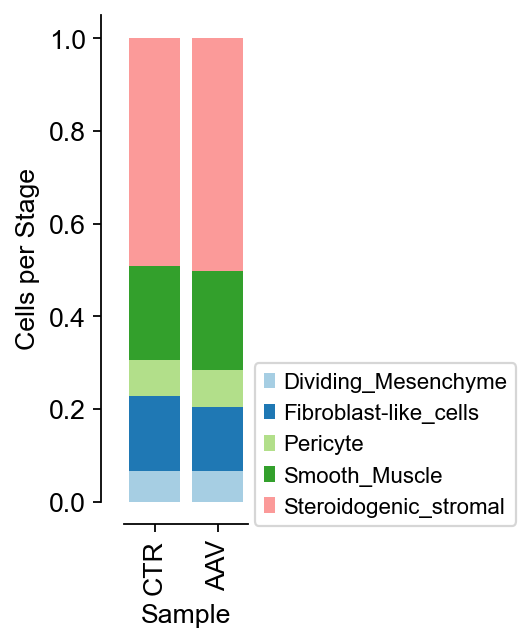

In [15]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize = (1,4))
ov.pl.cellproportion(adata=adata_fibro,
                     celltype_clusters='annotation',
                     groupby_li = ["CTR","AAV"],
                    groupby='Sample',
                    legend=True,
                    ax=ax
                    )

In [16]:
import matplotlib.pyplot as plt

# 创建图形和轴对象
fig, ax = plt.subplots(figsize=(1, 4))

# 绘制图像
ov.pl.cellproportion(adata=adata_fibro,
                     celltype_clusters='annotation',
                     groupby_li = ["CTR","AAV"],
                    groupby='Sample',
                    legend=True,
                    ax=ax
                    )


# 保存图像为PDF文件
plt.savefig("./figures/cellproportion_plot_mesenchyme.pdf", format='pdf', bbox_inches='tight')

# 关闭图形以节省内存
plt.close()

In [17]:
adata_fibro = adata_fibro[adata_fibro.obs["annotation"].isin(["Fibroblast-like_cells"])]
adata_fibro

View of AnnData object with n_obs × n_vars = 16788 × 16455
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'Sample', '_indices', '_scvi_batch', '_scvi_labels', 'total_abundance', 'EN_Blood', 'EN_Lymph', 'Epithelium', 'GC_Antral', 'GC_Atretic', 'GC_CL_Active', 'GC_CL_Lytic', 'GC_Estrous', 'GC_Mitotic', 'GC_Mural', 'GC_Preantral', 'I_B_Cell', 'I_Dendritic_Cell', 'I_Granulocyte', 'I_Macrophage', 'I_T_Cell', 'M_Cortical Stroma', 'M_Dividing Mesenchyme', 'M_Immature Theca', 'M_Medullary Stroma', 'M_Pericyte', 'M_Smooth Muscle', 'M_Steroidogenic Theca', 'Oocyte', 'Level1_max_pred', 'Level1_max_pred_celltype', 'annotation'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts-AAV', 'mean_counts-AAV', 'log1p_mean_counts-AAV', 'pct_dropout_by_counts-AAV', 'total_counts-AAV', '

In [18]:
adata_fibro.X.max()

356.0

In [19]:
#normalize and high variable genes (HVGs) calculated
# adata_fibro=ov.pp.preprocess(adata_fibro,mode='shiftlog|pearson',n_HVGs=5000,)

#save the whole genes and filter the non-HVGs
# adata_fibro.raw = adata_fibro
#存储原始数据以便后续还原
adata_fibro.layers['counts']=adata_fibro.X.copy()

sc.pp.normalize_total(adata_fibro)
sc.pp.log1p(adata_fibro)
adata_fibro.layers['log1p']=adata_fibro.X.copy()
adata_fibro

normalizing counts per cell
    finished (0:00:00)


AnnData object with n_obs × n_vars = 16788 × 16455
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'Sample', '_indices', '_scvi_batch', '_scvi_labels', 'total_abundance', 'EN_Blood', 'EN_Lymph', 'Epithelium', 'GC_Antral', 'GC_Atretic', 'GC_CL_Active', 'GC_CL_Lytic', 'GC_Estrous', 'GC_Mitotic', 'GC_Mural', 'GC_Preantral', 'I_B_Cell', 'I_Dendritic_Cell', 'I_Granulocyte', 'I_Macrophage', 'I_T_Cell', 'M_Cortical Stroma', 'M_Dividing Mesenchyme', 'M_Immature Theca', 'M_Medullary Stroma', 'M_Pericyte', 'M_Smooth Muscle', 'M_Steroidogenic Theca', 'Oocyte', 'Level1_max_pred', 'Level1_max_pred_celltype', 'annotation'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts-AAV', 'mean_counts-AAV', 'log1p_mean_counts-AAV', 'pct_dropout_by_counts-AAV', 'total_counts-AAV', 'log1p_to

In [20]:
adata_fibro.write_h5ad("Integrate/adata_fibro_like.h5ad")

In [21]:
adata_fibro

AnnData object with n_obs × n_vars = 16788 × 16455
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'Sample', '_indices', '_scvi_batch', '_scvi_labels', 'total_abundance', 'EN_Blood', 'EN_Lymph', 'Epithelium', 'GC_Antral', 'GC_Atretic', 'GC_CL_Active', 'GC_CL_Lytic', 'GC_Estrous', 'GC_Mitotic', 'GC_Mural', 'GC_Preantral', 'I_B_Cell', 'I_Dendritic_Cell', 'I_Granulocyte', 'I_Macrophage', 'I_T_Cell', 'M_Cortical Stroma', 'M_Dividing Mesenchyme', 'M_Immature Theca', 'M_Medullary Stroma', 'M_Pericyte', 'M_Smooth Muscle', 'M_Steroidogenic Theca', 'Oocyte', 'Level1_max_pred', 'Level1_max_pred_celltype', 'annotation'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts-AAV', 'mean_counts-AAV', 'log1p_mean_counts-AAV', 'pct_dropout_by_counts-AAV', 'total_counts-AAV', 'log1p_to

In [22]:
adata_fibro.layers["log1p"] = adata_fibro.X.copy()
dds=ov.bulk.pyDEG(adata_fibro.to_df(layer='log1p').T)
dds.drop_duplicates_index()
print('... drop_duplicates_index success')

... drop_duplicates_index success


In [23]:
treatment_groups=adata_fibro.obs[adata_fibro.obs['Sample']=='AAV'].index.tolist()
control_groups=adata_fibro.obs[adata_fibro.obs['Sample']=='CTR'].index.tolist()
df = dds.deg_analysis(treatment_groups,control_groups,method='ttest')
result = df[df.index.isin(['Gpnmb', 'Enpp2'])]

# 显示结果
result

,pvalue,qvalue,FoldChange,MaxBaseMean,BaseMean,log2(BaseMean),log2FC,abs(log2FC),size,-log(pvalue),-log(qvalue),sig
Enpp2,0.000000e+00,0.000000e+00,0.311585,0.055835,0.036612,-4.771547,-1.682304,1.682304,0.031158,inf,inf,sig
Gpnmb,1.986205e-09,6.578705e-09,1.928150,0.021974,0.016682,-5.905526,0.947217,0.947217,0.192815,8.701976,8.18186,sig


In [25]:
df.to_csv("./csv/deg_fibro.csv")

In [6]:
adata_fibro = sc.read_h5ad("Integrate/adata_fibro_like.h5ad")
# adata_fibro = adata_fibro[:, adata_fibro.var.highly_variable_features]
adata_fibro

AnnData object with n_obs × n_vars = 16788 × 5000
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'Sample', '_indices', '_scvi_batch', '_scvi_labels', 'total_abundance', 'EN_Blood', 'EN_Lymph', 'Epithelium', 'GC_Antral', 'GC_Atretic', 'GC_CL_Active', 'GC_CL_Lytic', 'GC_Estrous', 'GC_Mitotic', 'GC_Mural', 'GC_Preantral', 'I_B_Cell', 'I_Dendritic_Cell', 'I_Granulocyte', 'I_Macrophage', 'I_T_Cell', 'M_Cortical Stroma', 'M_Dividing Mesenchyme', 'M_Immature Theca', 'M_Medullary Stroma', 'M_Pericyte', 'M_Smooth Muscle', 'M_Steroidogenic Theca', 'Oocyte', 'Level1_max_pred', 'Level1_max_pred_celltype', 'annotation'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts-AAV', 'mean_counts-AAV', 'log1p_mean_counts-AAV', 'pct_dropout_by_counts-AAV', 'total_counts-AAV', 'log1p_tot

In [3]:
adata_fibro.uns['Sample_colors'] = ['#DFDFDF','#F29A9D']

图表已保存为 figures/enpp2_fibro_like.pdf


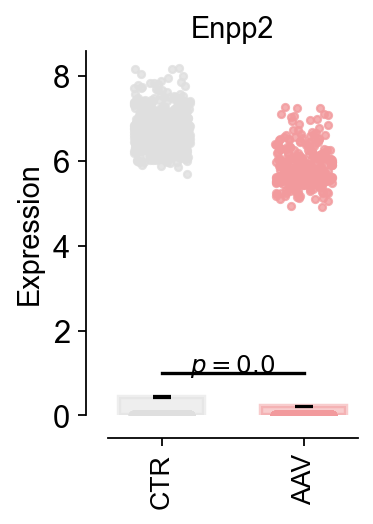

In [4]:
import matplotlib.pyplot as plt
# 需要改成CTR是灰色#DFDFDF，AAV组是粉红色#F29A9D
fig, ax = plt.subplots(figsize=(2,3))
ov.pl.bardotplot(adata_fibro,groupby='Sample',color='Enpp2',figsize=(2,2),
           ax=ax,
          ylabel='Expression',
           bar_kwargs={'alpha':0.5,'linewidth':2,'width':0.6,'capsize':4},
           scatter_kwargs={'alpha':0.8,'s':10,'marker':'o'})

ov.pl.add_palue(ax,line_x1=0,line_x2=1,line_y=1,
          text_y=0.02,
          text='$p={}$'.format(round(0.0000001,5)),
          fontsize=11,fontcolor='#000000',
             horizontalalignment='center')

# 保存图表为 PDF 文件
pdf_file_path = 'figures/enpp2_fibro_like.pdf'
plt.savefig(pdf_file_path, format='pdf', bbox_inches='tight')
print(f'图表已保存为 {pdf_file_path}')

# 显示图表
plt.show()

In [29]:
fibro_filtered

,Unnamed: 0,pvalue,qvalue,FoldChange,MaxBaseMean,BaseMean,log2(BaseMean),log2FC,abs(log2FC),size,-log(pvalue),-log(qvalue),sig
60,Psap,0.000000,0.000000,0.493487,0.555676,0.414944,-1.269012,-1.018916,1.018916,0.049349,inf,inf,sig
74,Atpif1,0.000000,0.000000,0.490381,0.499914,0.372528,-1.424581,-1.028024,1.028024,0.049038,inf,inf,sig
112,Prdx1,0.000000,0.000000,0.464342,0.427889,0.313284,-1.674456,-1.106742,1.106742,0.046434,inf,inf,sig
193,Glg1,0.000000,0.000000,0.487603,0.327747,0.243775,-2.036375,-1.036220,1.036220,0.048760,inf,inf,sig
269,Gdi2,0.000000,0.000000,0.451292,0.286094,0.207600,-2.268124,-1.147866,1.147866,0.045129,inf,inf,sig
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14017,Hspa1l,0.026124,0.048327,0.023857,0.000525,0.000262,-11.895416,-5.389465,5.389465,0.002386,1.582966,1.315814,sig
14020,Gpr151,0.025153,0.046689,0.023885,0.000524,0.000262,-11.897164,-5.387758,5.387758,0.002388,1.599403,1.330783,sig
14025,Hyal4,0.023492,0.043868,0.023930,0.000523,0.000262,-11.899930,-5.385059,5.385059,0.002393,1.629074,1.357851,sig
14029,Spink8,0.024932,0.046335,0.023954,0.000523,0.000261,-11.901419,-5.383606,5.383606,0.002395,1.603251,1.334093,sig


In [32]:
gpnmb_filtered

,Unnamed: 0,pvalue,qvalue,FoldChange,MaxBaseMean,BaseMean,log2(BaseMean),log2FC,abs(log2FC),size,-log(pvalue),-log(qvalue),sig
62,Col3a1,0.000000e+00,0.000000e+00,2.196410,6.402847,4.658464,2.219854,1.135148,1.135148,0.219641,inf,inf,sig
119,Gpx3,0.000000e+00,0.000000e+00,2.133840,4.703291,3.453200,1.787934,1.093452,1.093452,0.213384,inf,inf,sig
125,Col1a2,0.000000e+00,0.000000e+00,2.385701,4.893708,3.471922,1.795734,1.254413,1.254413,0.238570,inf,inf,sig
218,Col1a1,0.000000e+00,0.000000e+00,2.993013,4.168090,2.779700,1.474929,1.581598,1.581598,0.299301,inf,inf,sig
250,Selenop,0.000000e+00,0.000000e+00,2.913981,3.811303,2.558981,1.355569,1.542992,1.542992,0.291398,inf,inf,sig
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4888,Gcsam,7.407078e-05,1.500624e-04,2.355759,0.008676,0.005619,-7.475420,1.236192,1.236192,0.235576,4.130353,3.823728,sig
4898,Gcgr,8.776920e-05,1.771683e-04,2.336592,0.008574,0.005565,-7.489515,1.224406,1.224406,0.233659,4.056658,3.751614,sig
4924,Mcoln2,2.328578e-10,6.157002e-10,3.513373,0.011488,0.006682,-7.225422,1.812857,1.812857,0.351337,9.632909,9.210631,sig
4927,Tspoap1,2.773900e-10,7.307429e-10,3.495325,0.011424,0.006651,-7.232194,1.805427,1.805427,0.349532,9.556910,9.136235,sig


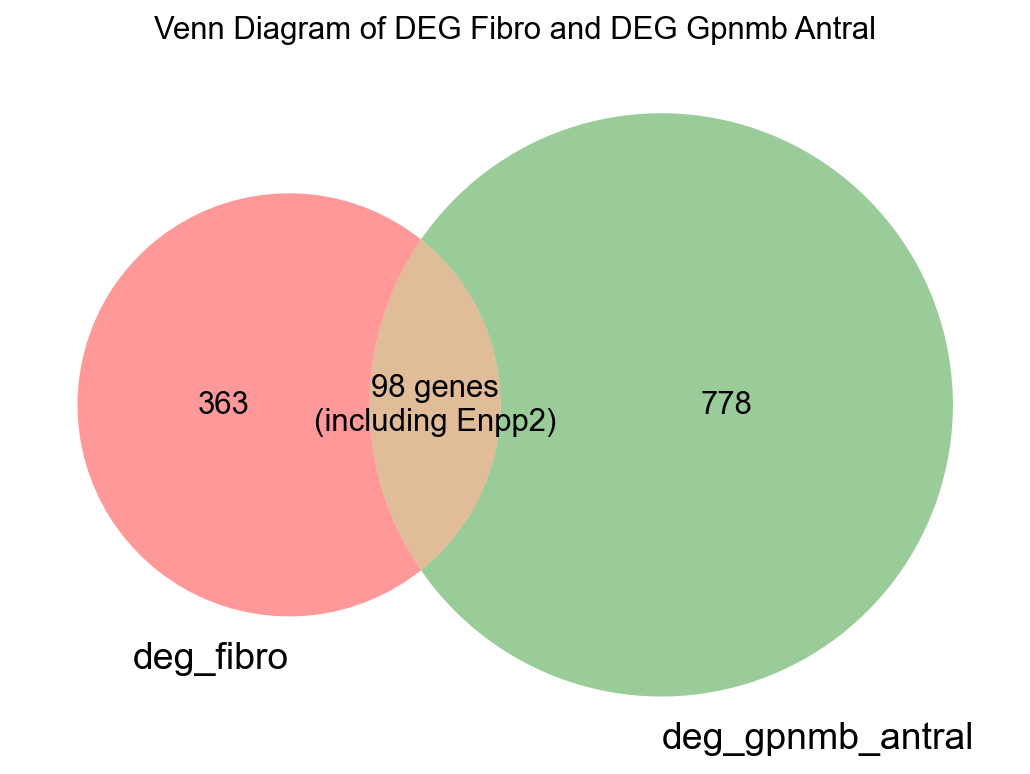

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# 读取数据
fibro_df = pd.read_csv('./csv/deg_fibro.csv')
gpnmb_df = pd.read_csv('./csv/deg_gpnmb_antral.csv')

# 筛选 fibro_df 中 'sig' 列为 'sig' 且 log2FC < -1 的基因
fibro_filtered = fibro_df[(fibro_df['sig'] == 'sig') & (fibro_df['log2FC'] < -1)]
fibro_genes = fibro_filtered['Unnamed: 0'].tolist()

# 筛选 gpnmb_df 中 'sig' 列为 'sig' 且 log2FC > 1 的基因
gpnmb_filtered = gpnmb_df[(gpnmb_df['sig'] == 'sig') & (gpnmb_df['log2FC'] > 1)]
gpnmb_genes = gpnmb_filtered['Unnamed: 0'].tolist()


# 生成基因集合
fibro_set = set(fibro_genes)
gpnmb_set = set(gpnmb_genes)

# 交集
intersection = fibro_set & gpnmb_set

# 绘制韦恩图
plt.figure(figsize=(8, 6))
v = venn2([fibro_set, gpnmb_set], ('deg_fibro', 'deg_gpnmb_antral'))

# 标注交集的基因个数，并注明包含Enpp2
intersection_text = f'{len(intersection)} genes\n(including Enpp2)' if 'Enpp2' in intersection else f'{len(intersection)} genes'
v.get_label_by_id('11').set_text(intersection_text)


plt.title('Venn Diagram of DEG Fibro and DEG Gpnmb Antral')
# 保存图像为 PDF 文件
plt.savefig('./figures/venn_diagram.pdf')

plt.show()


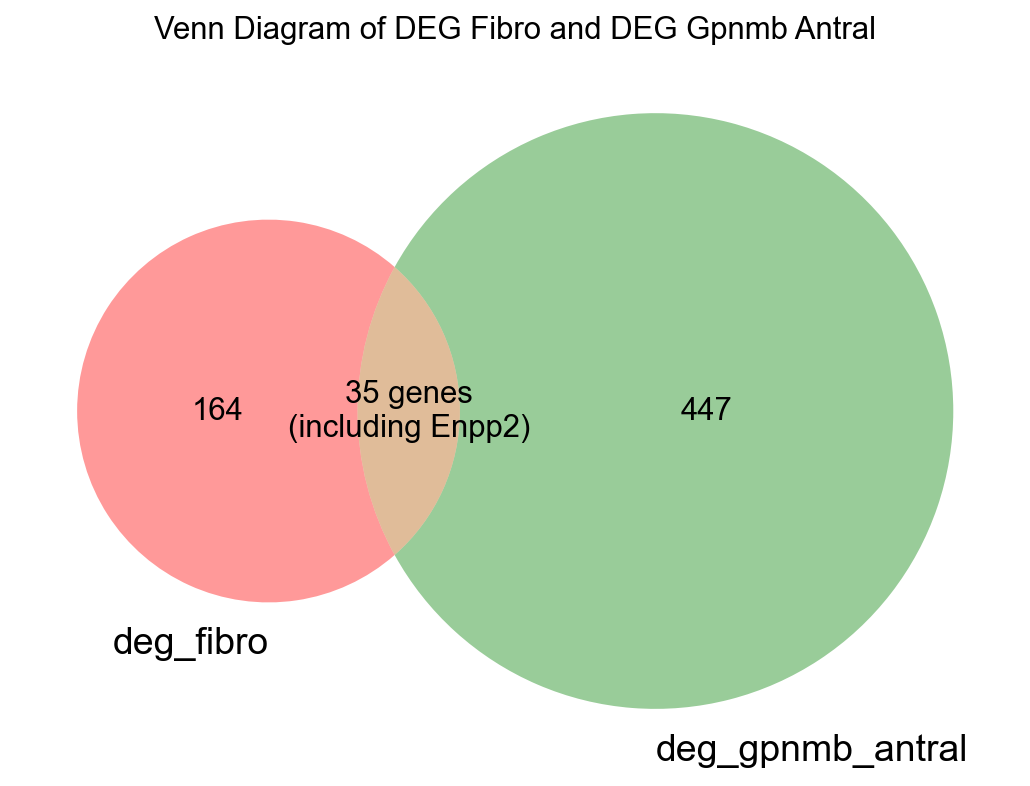

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# 读取数据
fibro_df = pd.read_csv('./csv/deg_fibro.csv')
gpnmb_df = pd.read_csv('./csv/deg_gpnmb_antral.csv')

# 筛选 fibro_df 中 'sig' 列为 'sig' 且 log2FC < -1 的基因
fibro_filtered = fibro_df[(fibro_df['sig'] == 'sig') & (fibro_df['log2FC'] < -1.5)]
fibro_genes = fibro_filtered['Unnamed: 0'].tolist()

# 筛选 gpnmb_df 中 'sig' 列为 'sig' 且 log2FC > 1 的基因
gpnmb_filtered = gpnmb_df[(gpnmb_df['sig'] == 'sig') & (gpnmb_df['log2FC'] > 1.5)]
gpnmb_genes = gpnmb_filtered['Unnamed: 0'].tolist()


# 生成基因集合
fibro_set = set(fibro_genes)
gpnmb_set = set(gpnmb_genes)

# 交集
intersection = fibro_set & gpnmb_set

# 绘制韦恩图
plt.figure(figsize=(8, 6))
v = venn2([fibro_set, gpnmb_set], ('deg_fibro', 'deg_gpnmb_antral'))

# 标注交集的基因个数，并注明包含Enpp2
intersection_text = f'{len(intersection)} genes\n(including Enpp2)' if 'Enpp2' in intersection else f'{len(intersection)} genes'
v.get_label_by_id('11').set_text(intersection_text)


plt.title('Venn Diagram of DEG Fibro and DEG Gpnmb Antral')
# 保存图像为 PDF 文件
plt.savefig('./figures/venn_diagram.pdf')

plt.show()


In [27]:
gpnmb_genes.__len__()

876

In [11]:
intersection_text

'28 genes\n(including Enpp2)'

In [35]:
print(intersection)

{'Stra6', 'Galnt6', 'Megf10', 'Sh2d1b1', 'Crtac1', 'Wnt7b', 'Apba2', 'Tnfrsf26', 'Tmem140', 'Hc', 'Pstpip2', 'Slc2a6', 'Trpm6', 'Pdzrn4', 'Enpp2', 'Ahnak2', 'Scgb1a1', 'Nlrp10', 'Lrrc55', 'Ly9', 'Kcnh3', 'Cdsn', 'Cyp2e1', 'Cd22', 'S100a8', 'Nrep', 'Olfr769', 'Card9', 'Chrna2', 'Islr2', 'Plekhg4', 'Slc16a11', 'Kcna4', 'Gfi1', 'Lpcat2'}


In [37]:
import csv
# 定义CSV文件的保存路径
csv_file_path = "csv/intersection_output.csv"

# 将列表写入CSV文件，每个元素占一行
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    for item in intersection:
        writer.writerow([item])

print(f"列表已保存为 {csv_file_path}")

列表已保存为 csv/intersection_output.csv
